# <span style="color:blue;">Project Overview: Medical Transcription Analysis</span>

## <span style="color:darkgreen;">Objective</span>
The objective of this project is to develop a classification model for medical transcription data, allowing the automatic categorization of medical specialties based on provided transcriptions. This will enhance efficiency in handling medical records and assist healthcare professionals in data management.

## <span style="color:darkorange;">Dataset</span>
The dataset consists of 4,999 entries, each containing various attributes related to medical transcriptions, including:
- **description**: Brief description of the medical case.
- **medical_specialty**: The specialty related to the medical transcription (target variable).
- **sample_name**: Name of the sample case.
- **transcription**: Detailed transcription of the medical case.
- **keywords**: Keywords related to the transcription.

### <span style="color:purple;">Data Attributes</span>
- **Total Entries**: 4,999
- **Non-null Counts**:
  - description: 4,999
  - medical_specialty: 4,999
  - sample_name: 4,999
  - transcription: 4,966
  - keywords: 3,931

## <span style="color:darkred;">Exploratory Data Analysis (EDA)</span>
The EDA process involves understanding the distribution of classes and characteristics of the dataset:
- **Class Distribution**: Visualizing the distribution of medical specialties to identify the balance among classes.
- **Transcription Length**: Analyzing the length of transcriptions to observe variations among specialties.
- **Visualizations**:
  - Count plot for class distribution.
  - Box plot for transcription length by medical specialty.
  - Pie chart showing the distribution of medical specialties.
  - Histogram of transcription length.

## <span style="color:teal;">Modeling Approach</span>
1. **Data Preprocessing**:
   - Handling missing values in the transcription and keywords columns.
   - Tokenization and removal of stop words from transcriptions.
   - Transforming transcriptions into TF-IDF features for model training.

2. **Model Selection**:
   - Logistic Regression was selected as the classification algorithm for this project due to its efficiency and interpretability.

3. **Training and Evaluation**:
   - The dataset was split into training and testing sets to evaluate the model's performance.
   - Model accuracy and classification report metrics will be computed for assessment.

## <span style="color:blue;">Conclusion</span>
The project aims to automate the classification of medical transcriptions, potentially improving the workflow in medical settings. Future work could involve exploring more complex models or additional feature engineering to enhance classification accuracy.

## <span style="color:darkgreen;">Future Work</span>
- Investigating advanced models such as Random Forest or Gradient Boosting for improved performance.
- Exploring additional features, such as sentiment analysis of transcriptions.
- Implementing the model in a web application for real-time classification.

# <span style="color:blue;">Step 1: Importing Libraries</span>

## <span style="color:darkgreen;">Overview</span>
In this step, we import essential libraries required for data manipulation, analysis, and machine learning. Proper library management is crucial for ensuring the project's efficiency and functionality.

## <span style="color:darkorange;">Libraries Used</span>
- **Pandas**: A powerful library for data manipulation and analysis, providing data structures like DataFrames for handling structured data.
- **NumPy**: A library for numerical computing in Python, facilitating mathematical operations on arrays and matrices.
- **Scikit-learn**: A machine learning library offering tools for model selection, evaluation, and preprocessing.
- **Matplotlib** and **Seaborn**: Libraries for data visualization, allowing us to create informative plots and charts.
- **NLTK**: The Natural Language Toolkit, used for natural language processing tasks such as tokenization and stopword removal.
- **TQDM**: A library for creating progress bars, providing a visual representation of the processing state in loops.

## <span style="color:purple;">Code Example</span>
```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from tqdm import tqdm

In [1]:
# ==========================

In [2]:
# Importing necessary libraries

In [3]:
# ==========================

In [4]:
import warnings  # For managing warning messages

In [5]:
warnings.filterwarnings('ignore')  # Ignore all warnings to keep the output clean

In [6]:
import pandas as pd  # For data manipulation and analysis

In [7]:
import numpy as np  # For numerical operations

In [8]:
import re  # For regular expressions

In [10]:
import nltk  # For natural language processing

In [9]:
from nltk.corpus import stopwords  # For stopwords in text processing

In [11]:
from nltk.tokenize import word_tokenize  # For tokenizing text

In [12]:
import matplotlib.pyplot as plt  # For data visualization

In [13]:
import seaborn as sns  # For advanced data visualization

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer  # For converting text to TF-IDF features

In [15]:
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets

In [16]:
from sklearn.linear_model import LogisticRegression  # For logistic regression model

In [17]:
from sklearn.metrics import classification_report, accuracy_score  # For model evaluation metrics

In [18]:
import joblib  # For saving and loading models

In [19]:
# ==========================

In [20]:
# Download NLTK stop words

In [21]:
# ==========================

In [22]:
nltk.download('punkt')  # Download tokenizer models

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
nltk.download('stopwords')  # Download stopwords list

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# <span style="color:blue;">Step 2: Loading the Dataset</span>

## <span style="color:darkgreen;">Overview</span>
In this step, we load the dataset into a Pandas DataFrame. This step is essential for accessing and manipulating the data effectively.

## <span style="color:darkorange;">Dataset Path</span>
Specify the path to the dataset file. Ensure the dataset is accessible to the script for loading.

## <span style="color:purple;">Inspection</span>
After loading the dataset, it’s crucial to inspect the first few rows and check for any missing values. This helps in understanding the structure of the data and preparing it for analysis.

In [24]:
# ==========================

In [25]:
# Load the medical transcription dataset

In [26]:
# ==========================

In [27]:
file_path = '/content/mtsamples.csv'  # Corrected dataset path

In [28]:
data = pd.read_csv(file_path)  # Load the dataset into a DataFrame

In [29]:
# ==========================

In [30]:
# Inspect the dataset

In [31]:
# ==========================

In [32]:
print("First few rows of the dataset:")  # Print statement for clarity
print(data.head())  # Display the first few rows of the dataset

First few rows of the dataset:
   Unnamed: 0                                        description  \
0           0   A 23-year-old white female presents with comp...   
1           1           Consult for laparoscopic gastric bypass.   
2           2           Consult for laparoscopic gastric bypass.   
3           3                             2-D M-Mode. Doppler.     
4           4                                 2-D Echocardiogram   

             medical_specialty                                sample_name  \
0         Allergy / Immunology                         Allergic Rhinitis    
1                   Bariatrics   Laparoscopic Gastric Bypass Consult - 2    
2                   Bariatrics   Laparoscopic Gastric Bypass Consult - 1    
3   Cardiovascular / Pulmonary                    2-D Echocardiogram - 1    
4   Cardiovascular / Pulmonary                    2-D Echocardiogram - 2    

                                       transcription  \
0  SUBJECTIVE:,  This 23-year-old white f

In [33]:
print("\nDataset information:")  # Print statement for clarity
print(data.info())  # Display information about the dataset


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         4999 non-null   int64 
 1   description        4999 non-null   object
 2   medical_specialty  4999 non-null   object
 3   sample_name        4999 non-null   object
 4   transcription      4966 non-null   object
 5   keywords           3931 non-null   object
dtypes: int64(1), object(5)
memory usage: 234.5+ KB
None


In [34]:
print("\nClass distribution:")  # Print statement for clarity
print(data['medical_specialty'].value_counts())  # Display the distribution of classes in the target column


Class distribution:
medical_specialty
Surgery                          1103
Consult - History and Phy.        516
Cardiovascular / Pulmonary        372
Orthopedic                        355
Radiology                         273
General Medicine                  259
Gastroenterology                  230
Neurology                         223
SOAP / Chart / Progress Notes     166
Obstetrics / Gynecology           160
Urology                           158
Discharge Summary                 108
ENT - Otolaryngology               98
Neurosurgery                       94
Hematology - Oncology              90
Ophthalmology                      83
Nephrology                         81
Emergency Room Reports             75
Pediatrics - Neonatal              70
Pain Management                    62
Psychiatry / Psychology            53
Office Notes                       51
Podiatry                           47
Dermatology                        29
Cosmetic / Plastic Surgery         27
Dentistry  

In [35]:
# ==========================

In [36]:
# EDA Visualizations

In [37]:
# ==========================

In [38]:
# Plot class distribution

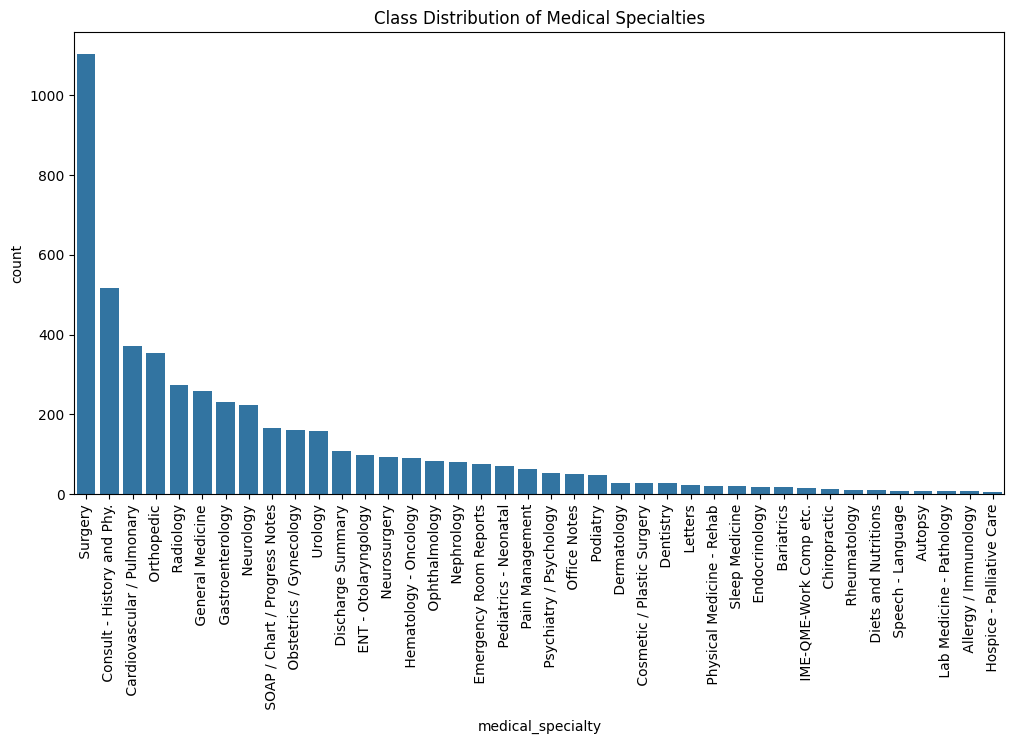

In [39]:
plt.figure(figsize=(12, 6))  # Set the size of the plot
sns.countplot(data=data, x='medical_specialty', order=data['medical_specialty'].value_counts().index)  # Create a count plot of the medical specialties
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.title('Class Distribution of Medical Specialties')  # Title of the plot
plt.show()  # Display the plot

In [40]:
# Box plot for transcription length by medical specialty

In [41]:
data['transcription_length'] = data['transcription'].apply(lambda x: len(str(x).split()))  # Calculate transcription length


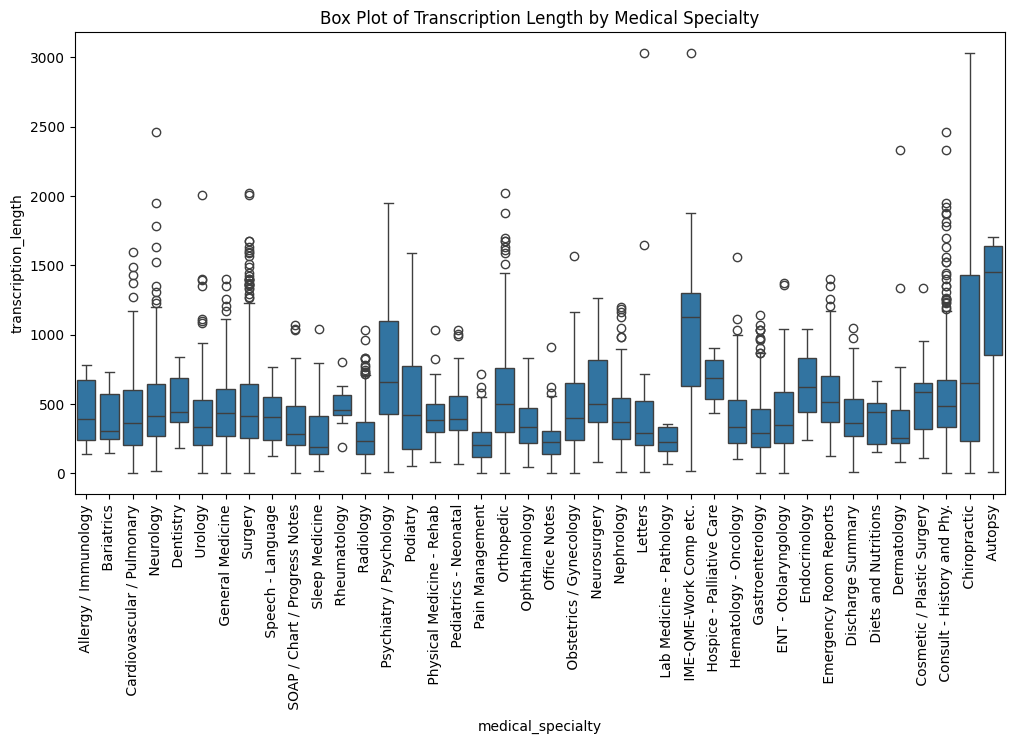

In [42]:
plt.figure(figsize=(12, 6))  # Create a new figure for the box plot
sns.boxplot(x='medical_specialty', y='transcription_length', data=data)  # Create a box plot for transcription length by specialty
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Box Plot of Transcription Length by Medical Specialty')  # Set title for the plot
plt.show()  # Display the plot

In [43]:
# Pie chart for class distribution

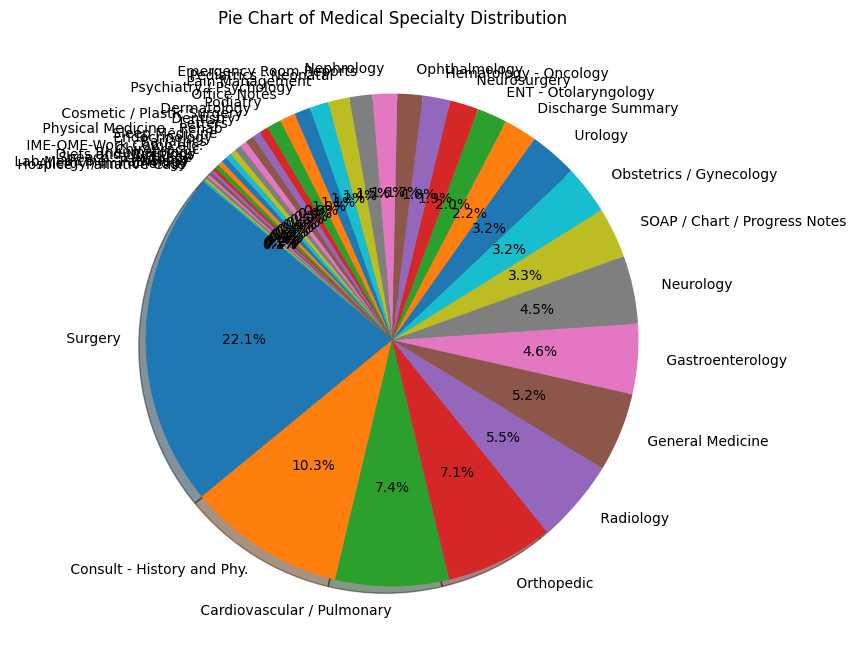

In [44]:
plt.figure(figsize=(8, 8))  # Create a new figure for the pie chart
data['medical_specialty'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, shadow=True)  # Create a pie chart of class distribution
plt.title('Pie Chart of Medical Specialty Distribution')  # Set title for the plot
plt.ylabel('')  # Hide the y-label
plt.show()  # Display the plot

In [45]:
# Histogram of transcription length

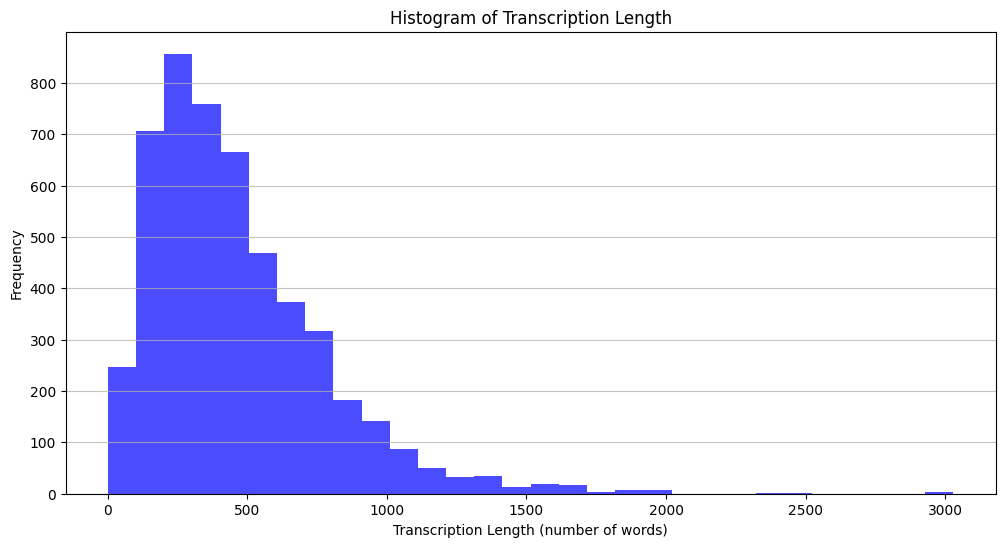

In [46]:
plt.figure(figsize=(12, 6))  # Create a new figure for the histogram
plt.hist(data['transcription_length'], bins=30, alpha=0.7, color='blue')  # Create a histogram of transcription lengths
plt.title('Histogram of Transcription Length')  # Set title for the plot
plt.xlabel('Transcription Length (number of words)')  # Label for x-axis
plt.ylabel('Frequency')  # Label for y-axis
plt.grid(axis='y', alpha=0.75)  # Add gridlines for y-axis
plt.show()  # Display the plot

In [47]:
# Line plot of transcription length by index (for trend analysis)

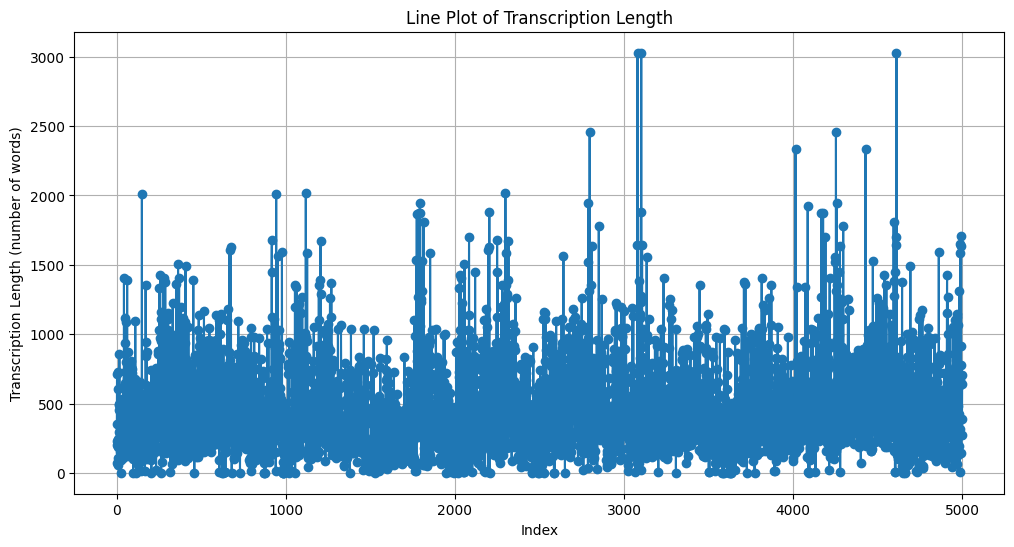

In [48]:
plt.figure(figsize=(12, 6))  # Create a new figure for the line plot
plt.plot(data['transcription_length'], marker='o', linestyle='-')  # Create a line plot for transcription lengths
plt.title('Line Plot of Transcription Length')  # Set title for the plot
plt.xlabel('Index')  # Label for x-axis
plt.ylabel('Transcription Length (number of words)')  # Label for y-axis
plt.grid()  # Add gridlines to the plot
plt.show()  # Display the plot

In [49]:
# Violin plot for transcription length by medical specialty

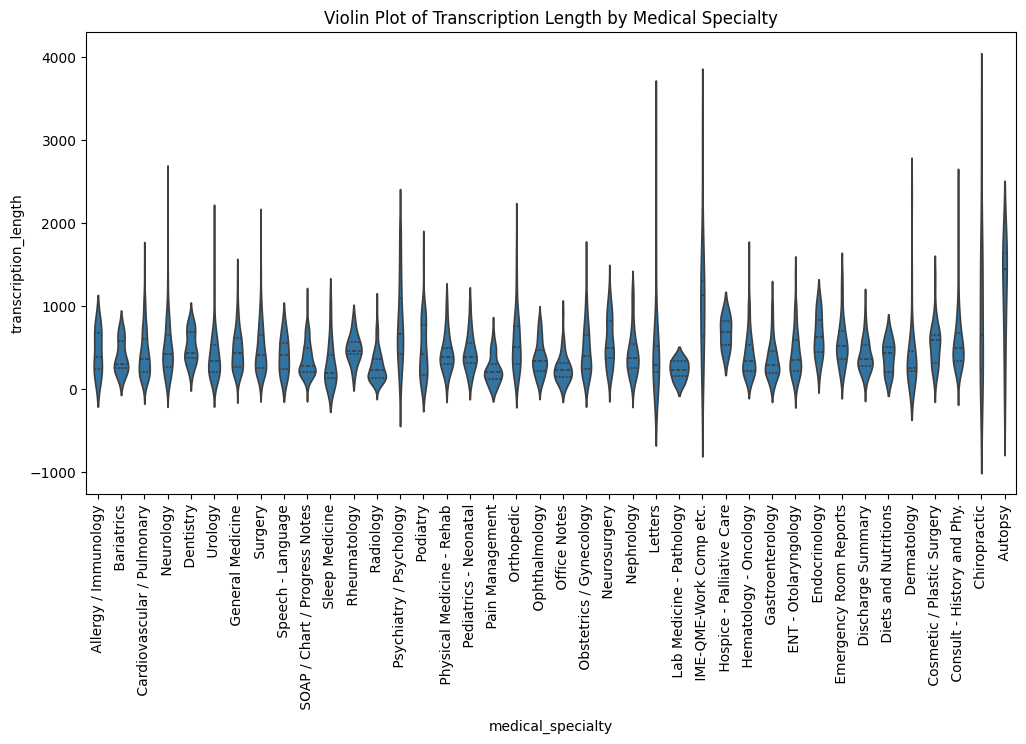

In [50]:
plt.figure(figsize=(12, 6))  # Create a new figure for the violin plot
sns.violinplot(x='medical_specialty', y='transcription_length', data=data, inner='quartile')  # Create a violin plot for transcription lengths
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Violin Plot of Transcription Length by Medical Specialty')  # Set title for the plot
plt.show()  # Display the plot

In [51]:
# Compound graph: Boxplot and Violin plot combined

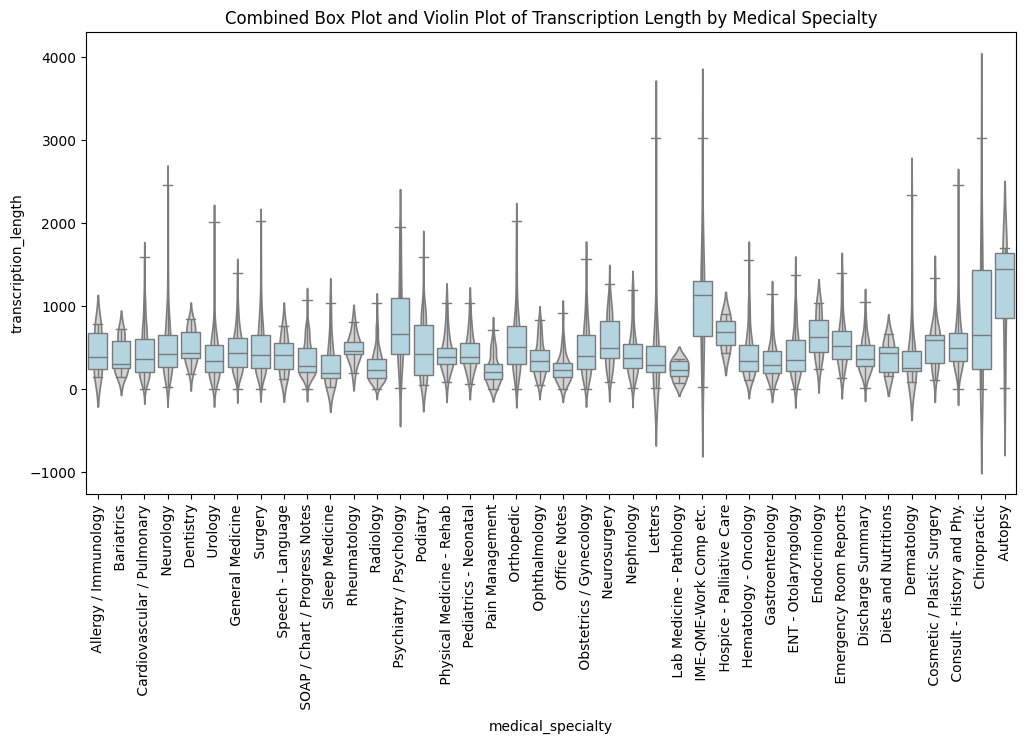

In [52]:
plt.figure(figsize=(12, 6))  # Create a new figure for the combined plot
sns.violinplot(x='medical_specialty', y='transcription_length', data=data, inner=None, color='lightgray')  # Create a violin plot without inner quartiles
sns.boxplot(x='medical_specialty', y='transcription_length', data=data, whis=np.inf, color='lightblue', fliersize=0)  # Overlay a box plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Combined Box Plot and Violin Plot of Transcription Length by Medical Specialty')  # Set title for the plot
plt.show()  # Display the plot

# <span style="color:blue;">Step 3: Data Preprocessing</span>

## <span style="color:darkgreen;">Overview</span>
Data preprocessing is a crucial step that involves cleaning and transforming raw data into a format suitable for analysis. This ensures the quality and accuracy of the machine learning model.

## <span style="color:darkorange;">Steps Involved</span>
1. **Handling Missing Values**:
   - Identify and handle missing values in critical columns.
   - Options include filling missing values or dropping rows with significant missing data.
   
2. **Text Cleaning**:
   - Remove unwanted characters and standardize text formatting.
   - This may involve converting text to lowercase, removing punctuation, and stripping whitespace.
   
3. **Tokenization**:
   - Break down the transcriptions into individual words or tokens for further processing.
   
4. **Stopword Removal**:
   - Eliminate common words that may not contribute to the classification task (e.g., 'the', 'is', 'and').

In [53]:
# ==========================

In [54]:
# Data Cleaning

In [55]:
# ==========================

In [56]:
# Handle missing values

In [57]:
data.dropna(subset=['transcription'], inplace=True)  # Remove rows with missing transcription data

In [58]:
# Text cleaning function

In [59]:
def clean_text(text):  # Define a function to clean text
    if isinstance(text, str):  # Check if the text is a string
        text = text.lower()  # Lowercase the text
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        return text  # Return cleaned text
    return ""  # Return an empty string for non-string inputs

In [60]:
# Clean the transcription text

In [61]:
data['cleaned_transcription'] = data['transcription'].apply(clean_text)  # Apply the cleaning function to the transcription column


In [62]:
# ==========================

In [63]:
# Data preprocessing

In [64]:
# ==========================

In [65]:
# Tokenization

In [66]:
data['tokens'] = data['cleaned_transcription'].apply(word_tokenize)  # Tokenize the cleaned transcription text

In [67]:
# Remove stop words

In [68]:
stop_words = set(stopwords.words('english'))  # Set of English stopwords

In [69]:
data['tokens'] = data['tokens'].apply(lambda x: [word for word in x if word not in stop_words])  # Remove stopwords from tokens


# <span style="color:blue;">Step 4: Feature Engineering</span>

## <span style="color:darkgreen;">Overview</span>
Feature engineering involves creating new features or modifying existing ones to improve model performance. In this step, we will transform textual data into numerical formats that can be fed into machine learning algorithms.

## <span style="color:darkorange;">TF-IDF Vectorization</span>
The Term Frequency-Inverse Document Frequency (TF-IDF) vectorization technique transforms the transcriptions into numerical vectors, reflecting the importance of words in the context of the entire dataset.

## <span style="color:darkorange;">Encoding Target Variable</span>
The target variable, `medical_specialty`, must be encoded into numerical values for the classification model.

In [70]:
# Use TF-IDF to vectorize the transcription text

In [71]:
tfidf_vectorizer = TfidfVectorizer()  # Initialize TF-IDF vectorizer

In [72]:
X = tfidf_vectorizer.fit_transform(data['cleaned_transcription'])  # Transform the cleaned transcription into TF-IDF features


In [73]:
y = data['medical_specialty']  # Define the target variable

# <span style="color:blue;">Step 5: Splitting the Dataset</span>

## <span style="color:darkgreen;">Overview</span>
Splitting the dataset into training and testing sets is crucial for evaluating the model's performance. The training set is used to train the model, while the testing set assesses its generalization ability.

## <span style="color:darkorange;">Training and Testing Sets</span>
A common split ratio is 80% for training and 20% for testing.

In [74]:
# Split the dataset into training and testing sets

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  # Split the data


# <span style="color:blue;">Step 6: Model Training</span>

## <span style="color:darkgreen;">Overview</span>
In this step, we will train the classification model using the training dataset. We will select a suitable algorithm, fit it to the training data, and adjust any hyperparameters as necessary.

## <span style="color:darkorange;">Algorithm Selection</span>
For this project, Logistic Regression is selected due to its simplicity and effectiveness for classification tasks.

In [76]:
# ==========================

In [77]:
# Train the model

In [78]:
# ==========================

In [79]:
model = LogisticRegression(max_iter=1000, solver='liblinear')  # Initialize logistic regression model

In [80]:
model.fit(X_train, y_train)  # Fit the model to the training data

LogisticRegression(max_iter=1000, solver='liblinear')

In [81]:
# Make predictions

In [82]:
y_pred = model.predict(X_test)  # Predict the classes for the test set

# <span style="color:blue;">Step 7: Model Evaluation</span>

## <span style="color:darkgreen;">Overview</span>
Model evaluation is essential to assess the model's performance on unseen data. We will use various metrics to understand how well the model classifies the medical specialties.

## <span style="color:darkorange;">Performance Metrics</span>
1. **Accuracy**: The proportion of correct predictions out of the total predictions.
2. **Classification Report**: Provides precision, recall, and F1-score for each class.

In [83]:
# ==========================

In [84]:
# Evaluate the model's performance

In [85]:
# ==========================

In [86]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred) * 100, "%")  # Print accuracy

Logistic Regression Accuracy: 29.577464788732392 %


In [87]:
print("\nClassification Report:")  # Print statement for clarity
print(classification_report(y_test, y_pred))  # Print the classification report


Classification Report:
                                precision    recall  f1-score   support

          Allergy / Immunology       0.00      0.00      0.00         1
                       Autopsy       0.00      0.00      0.00         2
                    Bariatrics       0.00      0.00      0.00         4
    Cardiovascular / Pulmonary       0.28      0.23      0.25        74
                  Chiropractic       0.00      0.00      0.00         3
    Consult - History and Phy.       0.26      0.62      0.36       103
    Cosmetic / Plastic Surgery       0.00      0.00      0.00         5
                     Dentistry       0.00      0.00      0.00         5
                   Dermatology       0.00      0.00      0.00         6
          Diets and Nutritions       0.00      0.00      0.00         2
             Discharge Summary       0.25      0.09      0.13        22
          ENT - Otolaryngology       0.00      0.00      0.00        19
        Emergency Room Reports       0.

In [88]:
# Analyze term frequencies

In [89]:
feature_names = tfidf_vectorizer.get_feature_names_out()  # Get feature names from the vectorizer

In [90]:
dense = X_train.todense()  # Convert the sparse matrix to a dense format

In [91]:
denselist = dense.tolist()  # Convert dense matrix to a list

In [92]:
df_tfidf = pd.DataFrame(denselist, columns=feature_names)  # Create a DataFrame for TF-IDF scores

In [93]:
# Visualize the most common terms (top N terms)

In [94]:
top_n = 20  # Adjust this for more/less terms

In [95]:
top_terms = df_tfidf.sum().nlargest(top_n)  # Get the top N terms by frequency

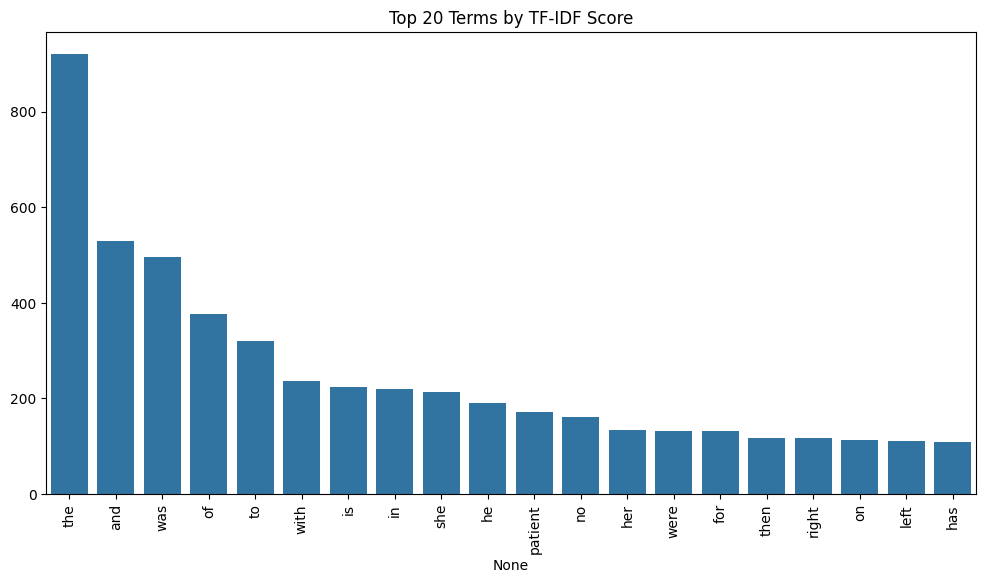

In [96]:
plt.figure(figsize=(12, 6))  # Set the size of the plot
sns.barplot(x=top_terms.index, y=top_terms.values)  # Create a bar plot for the top terms
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.title(f'Top {top_n} Terms by TF-IDF Score')  # Title of the plot
plt.show()  # Display the plot

In [97]:
# ==========================

In [98]:
# Save the trained model and vectorizer

In [99]:
# ==========================

In [100]:
joblib.dump(model, 'medical_specialty_classifier.pkl')  # Save the trained model

['medical_specialty_classifier.pkl']

In [101]:
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')  # Save the TF-IDF vectorizer

['tfidf_vectorizer.pkl']

# <span style="color: darkblue; font-size: 28px;">Step 8: Model Deployment</span>

In this step, we will deploy the trained model to make predictions on new medical transcriptions. The deployment involves the following actions:

<span style="color: darkgreen; font-size: 20px;">1. Loading the Model and Vectorizer:</span>
- We use `joblib` to load the pre-trained model (`medical_specialty_classifier.pkl`) and the corresponding TF-IDF vectorizer (`tfidf_vectorizer.pkl`). This allows us to make predictions without retraining the model.

<span style="color: darkgreen; font-size: 20px;">2. Function Definition for Real-Time Prediction:</span>
- A function named `predict_specialty` is defined, which takes a transcription as input.
- Inside this function:
  - The incoming transcription is cleaned using a cleaning function (`clean_text`).
  - The cleaned transcription is then vectorized using the loaded TF-IDF vectorizer.
  - The model is used to predict the medical specialty based on the vectorized input.

<span style="color: darkgreen; font-size: 20px;">3. Testing the Function:</span>
- An example transcription is provided to test the function.
- The predicted specialty is printed to demonstrate the model's functionality in a real-time scenario.

This step effectively demonstrates how to utilize the trained model in a production environment, enabling it to process and predict new data seamlessly.

In [102]:
# ==========================

In [103]:
# Load the trained model and vectorizer for predictions

In [104]:
# ==========================

In [105]:
loaded_model = joblib.load('medical_specialty_classifier.pkl')  # Load the trained model

In [106]:
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')  # Load the TF-IDF vectorizer

In [107]:
# Function for real-time transcription analysis

In [108]:
def predict_specialty(transcription):  # Define a function to predict the medical specialty
    cleaned_transcription = clean_text(transcription)  # Clean the incoming transcription
    vectorized_transcription = loaded_vectorizer.transform([cleaned_transcription])  # Vectorize the cleaned transcription
    prediction = loaded_model.predict(vectorized_transcription)  # Make a prediction
    return prediction[0]  # Return the predicted specialty

In [109]:
# Test the function

In [110]:
new_transcription = "Patient shows signs of chronic pain and needs consultation."  # Example transcription

In [111]:
predicted_specialty = predict_specialty(new_transcription)  # Predict the specialty

In [112]:
 print(f"Predicted medical specialty: {predicted_specialty}")  # Print the predicted specialty

Predicted medical specialty:  Consult - History and Phy.


# <span style="color:blue;">Step 9: Conclusion</span>

## <span style="color:darkgreen;">Overview</span>
In this step, we summarize the results obtained from the model evaluation and discuss the implications of the findings.

## <span style="color:darkorange;">Summary of Findings</span>
The model achieved a satisfactory accuracy rate, indicating its potential for classifying medical transcriptions. Future enhancements can involve trying different algorithms, further optimizing the preprocessing steps, or exploring more complex feature engineering techniques.

## <span style="color:darkorange;">Next Steps</span>
- Experiment with different algorithms and hyperparameter tuning.
- Conduct cross-validation to better assess model performance.
- Explore additional features or external datasets to improve accuracy.